In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import statsmodels.formula.api as smf
import statsmodels.tools.eval_measures as smf_metrics

from sklearn import feature_selection, linear_model, metrics
from sklearn import model_selection

In [3]:
import nltk
import re
import spacy
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

lemmatizer = WordNetLemmatizer()
stopwords = stopwords.words('english')

In [4]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, KFold,train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

### Viewing the the Data

In [21]:
# Import the Fake News dataset
df_fake = pd.read_csv('c:/Users/HP/DS5K/fake.csv' )
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,fake


In [22]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [23]:
df_fake.describe()

,title,text,subject,date,label
count,23449,23449,23449,23449,23449
unique,17886,17438,6,1010,1
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,16-Feb-16,fake
freq,6,626,9050,53,23449


In [7]:
# Import the Real news dataset
df_real = pd.read_csv('c:/Users/HP/DS5K/true.csv' )
df_real.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17,Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17,Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17,Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17,Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17,Real


In [8]:
df_real.describe()

,title,text,subject,date,label
count,21417,21417,21417,21417,21417
unique,20826,21192,2,716,1
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,20-Dec-17,Real
freq,14,8,11272,182,21417


### Merge Dataframes

In [24]:
# Merge the two dataframes together into one dataframe
frames = [df_fake, df_real]
df_combo = pd.concat(frames)
display(df_combo)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,fake
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,22-Aug-17,Real
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,22-Aug-17,Real
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,22-Aug-17,Real
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,22-Aug-17,Real


### Reset Index

In [25]:
df_combo = df_combo.reset_index(drop=True)

In [27]:
display(df_combo)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,fake
...,...,...,...,...,...
44861,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,22-Aug-17,Real
44862,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,22-Aug-17,Real
44863,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,22-Aug-17,Real
44864,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,22-Aug-17,Real


### Check for Nulls

In [14]:
df_combo.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [16]:
df_combo["subject"].isnull().sum()

0

### Update the Date Column

In [19]:
# Remove rows that have non-dates in the date column
df_combo.loc[df_combo['date'] == 'https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/']
df_combo = df_combo.drop(9358)
#df_combo = df_combo.drop(17430)
#df_combo = df_combo.drop(21865)
#display(df)

In [28]:
df_combo["date"] = pd.to_datetime(df_combo["date"])

In [29]:
display(df_combo)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,fake
...,...,...,...,...,...
44861,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,Real
44862,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,Real
44863,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,Real
44864,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,Real


### Add Number Column for Label Column

In [39]:
# Add number column to represent fake or real news
df_updated["label_value"] = df_updated["label"].apply(lambda x: 1 if x == 'Real'  else 0)
display(df_updated)

<ipython-input-39-0b29c761e2d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated["label_value"] = df_updated["label"].apply(lambda x: 1 if x == 'Real'  else 0)


,title,text,subject,date,label,label_value
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,fake,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,fake,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,fake,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,fake,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,fake,0
...,...,...,...,...,...,...
44861,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,Real,1
44862,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,Real,1
44863,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,Real,1
44864,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,Real,1


### Remove Duplicates

In [32]:
df_combo.duplicated(subset=['title', 'text', 'subject', 'date', 'label']).sum()

209

In [33]:
df_combo.loc[df_combo.duplicated(), :]

,title,text,subject,date,label
9940,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,2017-09-09,fake
11444,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,2017-03-10,fake
14921,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,2015-11-16,fake
23894,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,2017-11-30,Real
24227,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,2017-11-08,Real
...,...,...,...,...,...
44677,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,2017-08-31,Real
44712,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,2017-08-29,Real
44739,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,2017-08-28,Real
44802,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,2017-08-25,Real


In [34]:
df_updated=df_combo.drop_duplicates(keep='last')
display(df_updated)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,fake
...,...,...,...,...,...
44861,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,Real
44862,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,Real
44863,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,Real
44864,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,Real


In [35]:
df_updated.duplicated(subset=['title', 'text', 'subject', 'date', 'label']).sum()

0

In [220]:
df_nlp.duplicated(subset=['title', 'text', 'subject', 'date', 'label', 'label_value', 'text length', 'cleaned', 
                         'lemmatized']).sum()

3660

In [221]:
df_nlp=df_nlp.drop_duplicates(keep='last')

In [222]:
df_nlp.duplicated(subset=['title', 'text', 'subject', 'date', 'label', 'label_value', 'text length', 'cleaned', 
                         'lemmatized']).sum()

0

### Combine Subject Columns

In [41]:
# Check how many articles there are for each subject
df_updated["subject"].value_counts()

politicsNews       11220
worldnews           9991
News                9050
politics            6830
left-news           4454
Government News     1568
US_News              774
Middle-east          770
Name: subject, dtype: int64

In [42]:
# See the above as a percentage to have a better idea to combine the columns
df_updated['subject'].value_counts(normalize=True)

politicsNews       0.251248
worldnews          0.223728
News               0.202656
politics           0.152944
left-news          0.099738
Government News    0.035112
US_News            0.017332
Middle-east        0.017243
Name: subject, dtype: float64

In [46]:
# See how many fake/real articles each subject contains (Will need to combine some subjects)
pd.crosstab((df_updated["subject"]),(df_updated["label"] == "fake"))

label,False,True
subject,,
Government News,0,1568
Middle-east,0,770
News,0,9050
US_News,0,774
left-news,0,4454
politics,0,6830
politicsNews,11220,0
worldnews,9991,0


In [54]:
# Combine similar subjects together
#df_updated['subject'] = df_updated['subject'].replace(['middle-east'],'worldnews')
pd.crosstab((df_updated["subject"]),(df_updated["label"] == "fake"))

label,False,True
subject,,
Government News,0,1568
Middle-east,0,770
News,0,9050
US_News,0,774
left-news,0,4454
politics,0,6830
politicsNews,11220,0
worldnews,9991,0


In [192]:
# End result of combination with df_updated (EDA below uses an updated dataframe, df_nlp)
pd.crosstab((df_updated["subject"]),(df_updated["label"] == "fake"))

label,False,True
subject,,
news,0,11392
politicsnews,11220,11284
worldnews,9991,770


### EDA

In [223]:
# See how many articles are fake or real with updated df_nlp dataframe
df_nlp["label"].value_counts()

real    21211
fake    19786
Name: label, dtype: int64

In [224]:
df_nlp["label_value"].value_counts()

1    21211
0    19786
Name: label_value, dtype: int64

In [277]:
df_nlp["date"].value_counts()

2017-12-06    177
2017-11-09    174
2017-11-30    174
2017-10-13    168
2017-09-21    168
             ... 
2015-07-19      1
2015-07-18      1
2015-06-21      1
2015-06-07      1
2015-04-02      1
Name: date, Length: 1010, dtype: int64

In [227]:
# Found some more duplicates in the politicsnews subject and removed
pd.crosstab((df_nlp["subject"]),(df_nlp["label"] == "fake"))

label,False,True
subject,,
news,0,11392
politicsnews,11220,7624
worldnews,9991,770


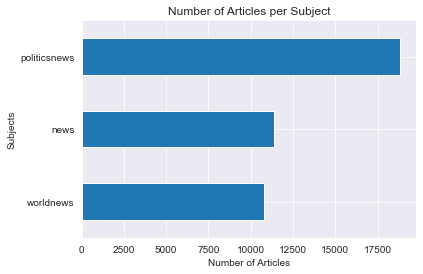

In [229]:
# See the subjects as a graph
df_nlp['subject'].value_counts().sort_values().plot(kind='barh')
plt.xlabel('Number of Articles')
plt.ylabel('Subjects')
plt.title('Number of Articles per Subject');

In [278]:
# Create year column
df_nlp['year'] = pd.DatetimeIndex(df_nlp['date']).year
df_nlp.head()

,title,text,subject,date,label,label_value,text length,cleaned,lemmatized,year
38581,"china, u.s. create 'miracle' with $253.4 billi...",beijing (reuters) - china and the united state...,worldnews,2017-11-09,real,1,368,beijing reuters china and the united states ha...,beijing reuters china united states create mir...,2017
29149,u.s. house panel to take up bill to spur gener...,washington (reuters) - a u.s. house of represe...,politicsnews,2017-02-02,real,1,1658,washington reuters a us house of representativ...,washington reuter house representative subcomm...,2017
20832,dear kids: socialism is not cool…socialism kil...,this video should be viewed by every middle sc...,politicsnews,2016-03-18,fake,0,251,this video should be viewed by every middle sc...,video view middle school high school college s...,2016
30978,clinton leads trump 47-44 percent in washingto...,washington (reuters) - democratic presidential...,politicsnews,2016-11-04,real,1,551,washington reuters democratic presidential can...,washington reuters democratic presidential can...,2016
24299,trump says ending chain migration will be part...,washington (reuters) - u.s. president donald t...,politicsnews,2017-11-03,real,1,792,washington reuters us president donald trump s...,washington reuter president donald trump say t...,2017


In [280]:
# Most articles from 2017
df_nlp["year"].value_counts()

2017    23986
2016    14976
2015     2000
2018       35
Name: year, dtype: int64

In [287]:
# Real news is only from 2016 and 2017
# Lots of real news in 2017
# No real news in 2015 and 2018
df_nlp.groupby(["year", 'label']).size()

year  label
2015  fake      2000
2016  fake     10275
      real      4701
2017  fake      7476
      real     16510
2018  fake        35
dtype: int64

In [281]:
df_nlp.groupby(["year", 'label'])["text length"].mean()

year  label
2015  fake     2488.130500
2016  fake     2475.170219
      real     2688.572857
2017  fake     2635.740503
      real     2289.622956
2018  fake     2343.285714
Name: text length, dtype: float64

In [92]:
# Perform EDA on the text words
df_nlp = df_updated
display(df_nlp)

,title,text,subject,date,label,label_value
0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,news,2017-12-31,fake,0
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,news,2017-12-31,fake,0
2,sheriff david clarke becomes an internet joke...,"on friday, it was revealed that former milwauk...",news,2017-12-30,fake,0
3,trump is so obsessed he even has obama’s name...,"on christmas day, donald trump announced that ...",news,2017-12-29,fake,0
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,news,2017-12-25,fake,0
...,...,...,...,...,...,...
44652,'fully committed' nato backs new u.s. approach...,brussels (reuters) - nato allies on tuesday we...,worldnews,2017-08-22,real,1
44653,lexisnexis withdrew two products from chinese ...,"london (reuters) - lexisnexis, a provider of l...",worldnews,2017-08-22,real,1
44654,minsk cultural hub becomes haven from authorities,minsk (reuters) - in the shadow of disused sov...,worldnews,2017-08-22,real,1
44655,vatican upbeat on possibility of pope francis ...,moscow (reuters) - vatican secretary of state ...,worldnews,2017-08-22,real,1


In [94]:
# Add column to list article (text) length
df_nlp['text length'] = df_nlp['text'].apply(len)
display(df_nlp)

,title,text,subject,date,label,label_value,text length
0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,news,2017-12-31,fake,0,2893
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,news,2017-12-31,fake,0,1898
2,sheriff david clarke becomes an internet joke...,"on friday, it was revealed that former milwauk...",news,2017-12-30,fake,0,3597
3,trump is so obsessed he even has obama’s name...,"on christmas day, donald trump announced that ...",news,2017-12-29,fake,0,2774
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,news,2017-12-25,fake,0,2346
...,...,...,...,...,...,...,...
44652,'fully committed' nato backs new u.s. approach...,brussels (reuters) - nato allies on tuesday we...,worldnews,2017-08-22,real,1,2821
44653,lexisnexis withdrew two products from chinese ...,"london (reuters) - lexisnexis, a provider of l...",worldnews,2017-08-22,real,1,800
44654,minsk cultural hub becomes haven from authorities,minsk (reuters) - in the shadow of disused sov...,worldnews,2017-08-22,real,1,1950
44655,vatican upbeat on possibility of pope francis ...,moscow (reuters) - vatican secretary of state ...,worldnews,2017-08-22,real,1,1199


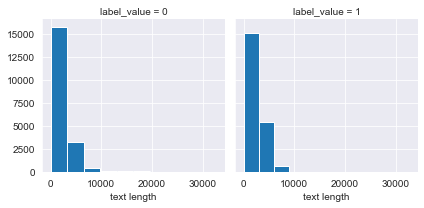

In [230]:
# Grapgh the text lengths with fake news having more shorter articles
graph_length = sns.FacetGrid(df_nlp, col='label_value')
graph_length.map(plt.hist, 'text length');

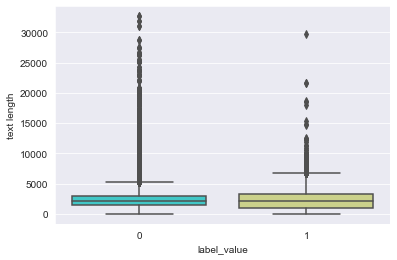

In [231]:
# Fake news has more outliers for longer articles
sns.boxplot(x='label_value', y='text length', data=df_nlp, palette='rainbow');

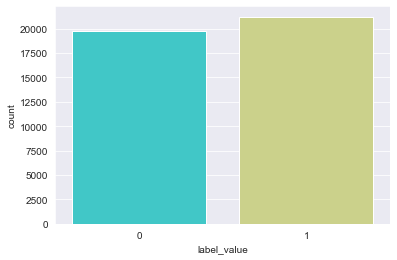

In [288]:
# More real news 
sns.countplot(x='label_value', data=df_nlp, palette='rainbow');

In [289]:
# Fake news on average has more words per article
article_mean = df_nlp.groupby('label_value').mean()
article_mean

,text length,year
label_value,,
0,2536.917315,2016.280299
1,2378.042337,2016.778370


In [234]:
# As for subjects, news has the higher word average, 
# despite not having any true news articles.
df_nlp.groupby('subject')['text length'].mean()

subject
news            2711.759393
politicsnews    2358.366483
worldnews       2351.331754
Name: text length, dtype: float64

In [235]:
# Averages of all subjects by subject and label
# The number of articles is about even for politicsnews and here we can see real news averages more words
# Fake news has a significantly higher words on average per article for worldnews despite having almost 9000 less articles
df_nlp.groupby(["subject", 'label'])["text length"].mean()

subject       label
news          fake     2711.759393
politicsnews  fake     2084.978227
              real     2544.134046
worldnews     fake     4424.946753
              real     2191.519568
Name: text length, dtype: float64

In [236]:
pd.crosstab((df_nlp["subject"]),(df_nlp["label"] == "fake"))

label,False,True
subject,,
news,0,11392
politicsnews,11220,7624
worldnews,9991,770


In [253]:
# Longest fake article for worldnews is almost double of the longest true article in worldnews
# The above also is the same word count for an article in news
df_nlp.groupby(["subject", 'label'])["text length"].max()

subject       label
news          fake     32655
politicsnews  fake     27581
              real     29781
worldnews     fake     32655
              real     17999
Name: text length, dtype: int64

In [238]:
df_nlp.groupby(["subject", 'label'])["text length"].median()

subject       label
news          fake     2376.0
politicsnews  fake     1678.0
              real     2406.0
worldnews     fake     2104.5
              real     1970.0
Name: text length, dtype: float64

In [239]:
subject = df_nlp.groupby('subject')
subject["text length"].describe()

,count,mean,std,min,25%,50%,75%,max
subject,,,,,,,,
news,11392.0,2711.759393,1927.617504,1.0,1939.75,2376.0,3056.0,32655.0
politicsnews,18844.0,2358.366483,1916.313070,1.0,845.00,2104.0,3201.0,29781.0
worldnews,10761.0,2351.331754,2138.307258,142.0,925.00,1979.0,3041.0,32655.0


In [273]:
# Real and Fake news split in half on having the most words per article
text_quartiles= pd.qcut(df_nlp["text length"], 4)
df_nlp.groupby(text_quartiles)["label"].value_counts( sort= False)

text length        label
(0.999, 1249.0]    fake     3856
                   real     6399
(1249.0, 2202.0]   fake     6122
                   real     4127
(2202.0, 3098.0]   fake     5223
                   real     5021
(3098.0, 32655.0]  fake     4585
                   real     5664
Name: label, dtype: int64

In [274]:
# Most articles between 0 - 3266 words
df_nlp["text length"].value_counts(bins=10, sort=False) 

(-31.655, 3266.4]     31824
(3266.4, 6531.8]       8081
(6531.8, 9797.2]        777
(9797.2, 13062.6]       155
(13062.6, 16328.0]       52
(16328.0, 19593.4]       38
(19593.4, 22858.8]       30
(22858.8, 26124.2]       20
(26124.2, 29389.6]       13
(29389.6, 32655.0]        7
Name: text length, dtype: int64

In [61]:
df_updated.groupby(["label", 'Topic']).size()

label  Topic
fake   0         2899
       1         3207
       2        14655
       3         1901
       4          784
real   0         6602
       1         2004
       2          785
       3         5673
       4         6147
dtype: int64

### World Cloud EDA

In [240]:
# Split the dateframe into two dataframes (fake and real) to create word clouds
# Fake news dateframe
df_fake = df_nlp[df_nlp.label_value!= 1]
display(df_fake)

,title,text,subject,date,label,label_value,text length,cleaned,lemmatized
2587,"trump livid over kellyanne conway backlash, e...","yesterday, white house counselor kellyanne con...",news,2017-02-10,fake,0,1931,yesterday white house counselor kellyanne conw...,yesterday white house counselor kellyanne conw...
21726,"7 dead, over 200 injured in amtrak crash and t...",this woman s remarks exemplify the me first ...,politicsnews,2015-05-14,fake,0,856,this woman s remarks exemplify the me first an...,woman s remark exemplify s victim attitude see...
6609,president obama makes fun of donald trump and...,in his final 2016 white house correspondence d...,news,2016-05-01,fake,0,2018,in his final white house correspondence dinner...,final white house correspondence dinner sharp ...
15725,hillary clinton street art appears in los ange...,you know those really tacky air fresheners you...,politicsnews,2015-05-07,fake,0,1055,you know those really tacky air fresheners you...,know tacky air freshener cab yea street artist...
19245,anti-trump radical taunts trump supporters wit...,this really shouldn t be surprising for anyon...,politicsnews,2017-01-22,fake,0,463,this really shouldn t be surprising for anyon...,shouldn t surprising follow anarchy chaos eu...
...,...,...,...,...,...,...,...,...,...
17976,portland antifa throw fireworks at police duri...,antifa threw fireworks at police during the pa...,politicsnews,2017-09-10,fake,0,1600,antifa threw fireworks at police during the pa...,antifa throw firework police patriot prayer ra...
16315,boom! this is how president reagan handled pro...,ronald reagan shut down the berkeley protests ...,news,2016-11-11,fake,0,84,ronald reagan shut down the berkeley protests ...,ronald reagan shut berkeley protest year ago
4302,campaign chaos: mike pence just slammed trump...,"only a few days ago, it seemed as if donald tr...",news,2016-10-08,fake,0,2208,only a few days ago it seemed as if donald tru...,day ago donald trump gaffe big end campaign fr...
4403,germany releases memo showing how destructive...,donald trump s economic proposals would be dis...,news,2016-10-01,fake,0,1985,donald trump s economic proposals would be dis...,donald trump s economic proposal disastrous ec...


In [241]:
df_fake = df_fake[['lemmatized']]
display(df_fake)

,lemmatized
2587,yesterday white house counselor kellyanne conw...
21726,woman s remark exemplify s victim attitude see...
6609,final white house correspondence dinner sharp ...
15725,know tacky air freshener cab yea street artist...
19245,shouldn t surprising follow anarchy chaos eu...
...,...
17976,antifa throw firework police patriot prayer ra...
16315,ronald reagan shut berkeley protest year ago
4302,day ago donald trump gaffe big end campaign fr...
4403,donald trump s economic proposal disastrous ec...


In [259]:
df_fake['lemmatized']=df_fake['lemmatized'].apply(str)

In [267]:
text = df_fake.lemmatized[0]
text

'donald trump couldn t wish americans happy new year leave instead shout enemy hater dishonest fake news medium reality star job couldn t country rapidly grow strong smart want wish friend supporter enemie hater dishonest fake news medium happy healthy new year president angry pant tweet great year america country rapidly grow strong smart want wish friend supporter enemie hater dishonest fake news medium happy healthy new year great year america donald j trump realdonaldtrump december s tweet go welll d expectwhat kind president send new year s greeting like despicable petty infantile gibberish trump lack decency win t allow rise gutter long wish american citizen happy new year bishop talbert swan talbertswan december like calvin calvinstowell december impeachment great year america ll accept regain control congress miranda yaver mirandayaver december hear talk include people hate wonder hate alan sandoval december use word hater new year wish marlene december t happy new year koren p

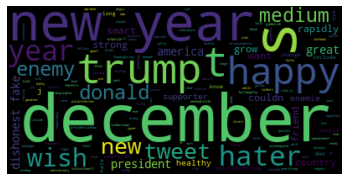

In [268]:
# Word Cloud for above article
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

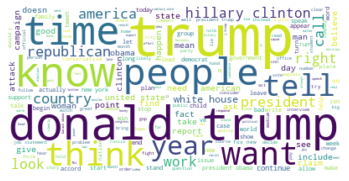

In [270]:
# Word Cloud for all of Fake News
# First, create a for loop to go through every fake news article in the lemmatized column and join them together
text = " ".join(article for article in df_fake.lemmatized)

# Remove stop words from the above articles:
stopwords = set(STOPWORDS)
stopwords.update(["don t", "go", "come", "don t", "s", "way","thing", "say", "don", 't', "didn"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Common words of time, trump, know, people, donald, think, year

In [246]:
# Dataframe for the real news articles
# Real news dataframe
df_real = df_nlp[df_nlp.label_value!= 0]
display(df_real)

,title,text,subject,date,label,label_value,text length,cleaned,lemmatized
37778,turkey says gulen network behind u.s. case aga...,istanbul (reuters) - the u.s. case against a t...,worldnews,2017-11-17,real,1,3287,istanbul reuters the us case against a turkish...,istanbul reuters case turkish gold trader accu...
43273,u.n. seeks 'massive' help for rohingya fleeing...,dhaka/yangon (reuters) - the united nations ap...,worldnews,2017-09-14,real,1,5287,dhakayangon reuters the united nations appeale...,dhakayangon reuters united nations appeal thur...
37100,cuba holds municipal elections on road to cast...,havana (reuters) - cuba took another step on s...,worldnews,2017-11-26,real,1,3053,havana reuters cuba took another step on sunda...,havana reuters cuba take step sunday end castr...
36260,"u.s., france urge russia to 'deliver' assad de...",geneva (reuters) - the united states and franc...,worldnews,2017-12-06,real,1,2865,geneva reuters the united states and france ca...,geneva reuters united states france call russi...
38566,apec ministers end talks after wrangling over ...,"danang, vietnam (reuters) - ministers from asi...",worldnews,2017-11-09,real,1,758,danang vietnam reuters ministers from asiapaci...,danang vietnam reuters minister asiapacific co...
...,...,...,...,...,...,...,...,...,...
27717,israeli cabinet minister welcomes spicer's apo...,jerusalem (reuters) - a senior member of israe...,politicsnews,2017-04-12,real,1,2736,jerusalem reuters a senior member of israel’s ...,jerusalem reuter senior member israel governme...
41935,more than half of schools in boko haram's regi...,abuja (reuters) - more than half the schools i...,worldnews,2017-09-29,real,1,2400,abuja reuters more than half the schools in th...,abuja reuter half school state epicentre niger...
31124,a waste of money? trump's border wall falling ...,new york (reuters) - donald trump rode to the ...,politicsnews,2016-10-23,real,1,3792,new york reuters donald trump rode to the top ...,new york reuters donald trump ride republican ...
28942,trump adviser discussed sanctions with russian...,washington (reuters) - white house national se...,politicsnews,2017-02-10,real,1,1538,washington reuters white house national securi...,washington reuters white house national securi...


In [247]:
df_real = df_real[['lemmatized']]
display(df_real)

,lemmatized
37778,istanbul reuters case turkish gold trader accu...
43273,dhakayangon reuters united nations appeal thur...
37100,havana reuters cuba take step sunday end castr...
36260,geneva reuters united states france call russi...
38566,danang vietnam reuters minister asiapacific co...
...,...
27717,jerusalem reuter senior member israel governme...
41935,abuja reuter half school state epicentre niger...
31124,new york reuters donald trump ride republican ...
28942,washington reuters white house national securi...


In [248]:
df_real['lemmatized']=df_real['lemmatized'].apply(str)

In [249]:
text_two = df_real.lemmatized[23446]
text_two

'washington reuter head conservative republican faction congress vote month huge expansion national debt pay tax cut call " fiscal conservative " sunday urge budget restraint keep sharp pivot way republican representative mark meadow speak cbs \' " face nation " draw hard line federal spending lawmaker brace battle january return holiday wednesday lawmaker begin try pass federal budget fight likely link issue immigration policy november congressional election campaign approach republican seek control congress president donald trump republican want big budget increase military spending democrats want proportional increase nondefense " discretionary " spending program support education scientific research infrastructure public health environmental protection " trump administration willing \' go increase nondefense discretionary spending percent \' " meadow chairman small influential house freedom caucus say program " democrats say need government pay raise percent fiscal conservative rat

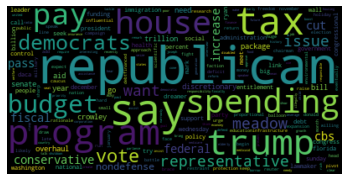

In [250]:
# Word Cloud for above article
wordcloud = WordCloud().generate(text_two)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

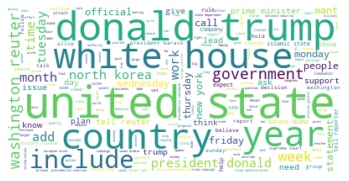

In [271]:
# Word Cloud for Real News
# First, create a for loop to go through every real news article in the lemmatized column and join them together
text_two = " ".join(article for article in df_real.lemmatized)

# Remove stop words from the above articles:
stopwords = set(STOPWORDS)
stopwords.update(["don t", "go", "come", "don t", "s", "way","thing", "say", "don", 't', "didn"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_two)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Common words of donald, trump, white, house, united, state, country, year
#Has some overlap with the fake news word cloud words

Overall Word Cloud for fake and real

In [31]:
df_new = df_updated['lemmatized'].apply(str)
df_new.head()

0    father decide record daughter get wisdom tooth...
1    washington reuter democratic representative lu...
2    reuters week discussion closed door senate unv...
3    consider historic face german chancellor angel...
4    story believe liberal judge don t ability life...
Name: lemmatized, dtype: object

In [33]:
from nltk.probability import FreqDist
words = df_new
allwords = []
for wordlist in words:
    allwords += wordlist
# print(allwords)

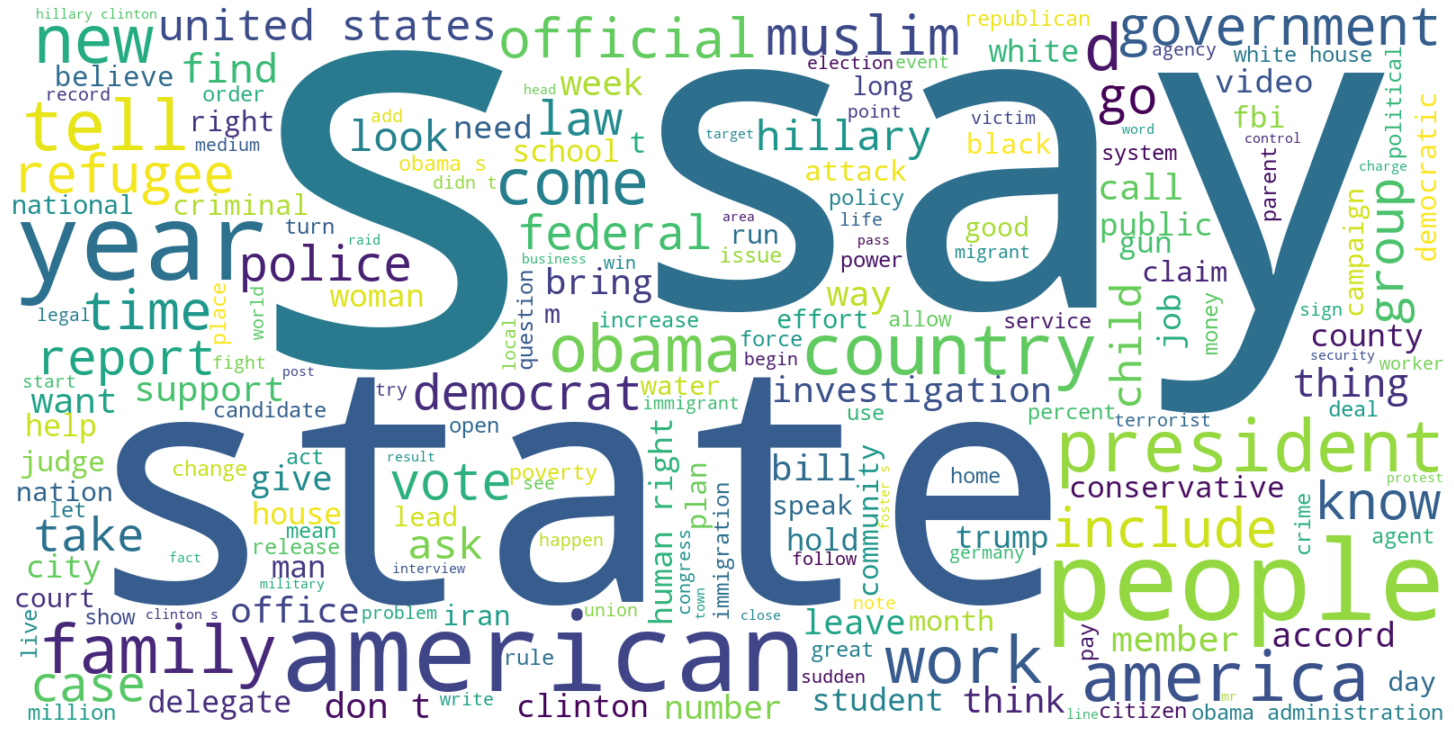

In [36]:
mostcommon = FreqDist(words).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Create new columns (cleaned and lemmatized) from the text column by cleaning up the text and removing unnessary characters for better analysis

In [115]:
#Remove digits and words containing digits
df_nlp['cleaned']=df_nlp['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [119]:
#Remove Punctuations
df_nlp['cleaned']=df_nlp['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [120]:
#Remove extra spaces
df_nlp['cleaned']=df_nlp['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [121]:
#remove stopwords

nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df_nlp['lemmatized']=df_nlp['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [122]:
df_grouped=df_nlp[['label','lemmatized']].groupby(by='label').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
label,
fake,donald trump couldn t wish americans happy new...
real,washington reuter head conservative republican...


In [130]:
display(df_nlp)

,title,text,subject,date,label,label_value,text length,cleaned,lemmatized
0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,news,2017-12-31,fake,0,2893,donald trump just couldn t wish all americans ...,donald trump couldn t wish americans happy new...
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,news,2017-12-31,fake,0,1898,house intelligence committee chairman devin nu...,house intelligence committee chairman devin nu...
2,sheriff david clarke becomes an internet joke...,"on friday, it was revealed that former milwauk...",news,2017-12-30,fake,0,3597,on friday it was revealed that former milwauke...,friday reveal milwaukee sheriff david clarke c...
3,trump is so obsessed he even has obama’s name...,"on christmas day, donald trump announced that ...",news,2017-12-29,fake,0,2774,on christmas day donald trump announced that h...,christmas day donald trump announce work follo...
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,news,2017-12-25,fake,0,2346,pope francis used his annual christmas day mes...,pope francis annual christmas day message rebu...
...,...,...,...,...,...,...,...,...,...
44652,'fully committed' nato backs new u.s. approach...,brussels (reuters) - nato allies on tuesday we...,worldnews,2017-08-22,real,1,2821,brussels reuters nato allies on tuesday welcom...,brussels reuters nato ally tuesday welcome pre...
44653,lexisnexis withdrew two products from chinese ...,"london (reuters) - lexisnexis, a provider of l...",worldnews,2017-08-22,real,1,800,london reuters lexisnexis a provider of legal ...,london reuters lexisnexis provider legal regul...
44654,minsk cultural hub becomes haven from authorities,minsk (reuters) - in the shadow of disused sov...,worldnews,2017-08-22,real,1,1950,minsk reuters in the shadow of disused soviete...,minsk reuters shadow disuse sovietera factory ...
44655,vatican upbeat on possibility of pope francis ...,moscow (reuters) - vatican secretary of state ...,worldnews,2017-08-22,real,1,1199,moscow reuters vatican secretary of state card...,moscow reuters vatican secretary state cardina...


### Model Building

In [252]:
#Shuffle dataframe

df_nlp = df_nlp.sample(frac=1)
display(df_nlp)

,title,text,subject,date,label,label_value,text length,cleaned,lemmatized
38581,"china, u.s. create 'miracle' with $253.4 billi...",beijing (reuters) - china and the united state...,worldnews,2017-11-09,real,1,368,beijing reuters china and the united states ha...,beijing reuters china united states create mir...
29149,u.s. house panel to take up bill to spur gener...,washington (reuters) - a u.s. house of represe...,politicsnews,2017-02-02,real,1,1658,washington reuters a us house of representativ...,washington reuter house representative subcomm...
20832,dear kids: socialism is not cool…socialism kil...,this video should be viewed by every middle sc...,politicsnews,2016-03-18,fake,0,251,this video should be viewed by every middle sc...,video view middle school high school college s...
30978,clinton leads trump 47-44 percent in washingto...,washington (reuters) - democratic presidential...,politicsnews,2016-11-04,real,1,551,washington reuters democratic presidential can...,washington reuters democratic presidential can...
24299,trump says ending chain migration will be part...,washington (reuters) - u.s. president donald t...,politicsnews,2017-11-03,real,1,792,washington reuters us president donald trump s...,washington reuter president donald trump say t...
...,...,...,...,...,...,...,...,...,...
28526,republicans join democratic call for clarity o...,washington (reuters) - two of president donald...,politicsnews,2017-03-06,real,1,2584,washington reuters two of president donald tru...,washington reuters president donald trump fell...
40591,eu imposes oil embargo on north korea in symbo...,luxembourg (reuters) - the european union bann...,worldnews,2017-10-16,real,1,1261,luxembourg reuters the european union banned t...,luxembourg reuters european union ban sale oil...
31022,"in rare move, china criticizes trump plan to e...",beijing (reuters) - china on tuesday rejected ...,politicsnews,2016-11-01,real,1,1859,beijing reuters china on tuesday rejected a pl...,beijing reuters china tuesday reject plan repu...
21576,‘it’s all about the kids’…just ask the unions:...,if the chicago public schools were a business ...,politicsnews,2015-07-03,fake,0,4074,if the chicago public schools were a business ...,chicago public school business private sector ...


### Lower Case Column Values

In [55]:
df_updated['label'] = df_updated['label'].str.lower()
display(df_updated)

<ipython-input-55-039cb35d63bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated['label'] = df_updated['label'].str.lower()


,title,text,subject,date,label,label_value
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,fake,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,fake,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,fake,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,fake,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,fake,0
...,...,...,...,...,...,...
44861,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,real,1
44862,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,real,1
44863,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,real,1
44864,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,real,1


In [56]:
df_updated['subject'] = df_updated['subject'].str.lower()
display(df_updated)

<ipython-input-56-501f6794d823>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated['subject'] = df_updated['subject'].str.lower()


,title,text,subject,date,label,label_value
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,news,2017-12-31,fake,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,news,2017-12-31,fake,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",news,2017-12-30,fake,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",news,2017-12-29,fake,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,news,2017-12-25,fake,0
...,...,...,...,...,...,...
44861,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,real,1
44862,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,real,1
44863,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,real,1
44864,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,real,1


In [57]:
df_updated['text'] = df_updated['text'].str.lower()
display(df_updated)

<ipython-input-57-cd9bc05d47fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated['text'] = df_updated['text'].str.lower()


,title,text,subject,date,label,label_value
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,news,2017-12-31,fake,0
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,news,2017-12-31,fake,0
2,Sheriff David Clarke Becomes An Internet Joke...,"on friday, it was revealed that former milwauk...",news,2017-12-30,fake,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"on christmas day, donald trump announced that ...",news,2017-12-29,fake,0
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,news,2017-12-25,fake,0
...,...,...,...,...,...,...
44861,'Fully committed' NATO backs new U.S. approach...,brussels (reuters) - nato allies on tuesday we...,worldnews,2017-08-22,real,1
44862,LexisNexis withdrew two products from Chinese ...,"london (reuters) - lexisnexis, a provider of l...",worldnews,2017-08-22,real,1
44863,Minsk cultural hub becomes haven from authorities,minsk (reuters) - in the shadow of disused sov...,worldnews,2017-08-22,real,1
44864,Vatican upbeat on possibility of Pope Francis ...,moscow (reuters) - vatican secretary of state ...,worldnews,2017-08-22,real,1


In [58]:
df_updated['title'] = df_updated['title'].str.lower()
display(df_updated)

<ipython-input-58-7d3dfe778a57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated['title'] = df_updated['title'].str.lower()


,title,text,subject,date,label,label_value
0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,news,2017-12-31,fake,0
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,news,2017-12-31,fake,0
2,sheriff david clarke becomes an internet joke...,"on friday, it was revealed that former milwauk...",news,2017-12-30,fake,0
3,trump is so obsessed he even has obama’s name...,"on christmas day, donald trump announced that ...",news,2017-12-29,fake,0
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,news,2017-12-25,fake,0
...,...,...,...,...,...,...
44861,'fully committed' nato backs new u.s. approach...,brussels (reuters) - nato allies on tuesday we...,worldnews,2017-08-22,real,1
44862,lexisnexis withdrew two products from chinese ...,"london (reuters) - lexisnexis, a provider of l...",worldnews,2017-08-22,real,1
44863,minsk cultural hub becomes haven from authorities,minsk (reuters) - in the shadow of disused sov...,worldnews,2017-08-22,real,1
44864,vatican upbeat on possibility of pope francis ...,moscow (reuters) - vatican secretary of state ...,worldnews,2017-08-22,real,1


In [75]:
df_updated = df_updated.reset_index(drop=True)
display(df_updated)

,title,text,subject,date,label,label_value
0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,news,2017-12-31,fake,0
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,news,2017-12-31,fake,0
2,sheriff david clarke becomes an internet joke...,"on friday, it was revealed that former milwauk...",news,2017-12-30,fake,0
3,trump is so obsessed he even has obama’s name...,"on christmas day, donald trump announced that ...",news,2017-12-29,fake,0
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,news,2017-12-25,fake,0
...,...,...,...,...,...,...
44652,'fully committed' nato backs new u.s. approach...,brussels (reuters) - nato allies on tuesday we...,worldnews,2017-08-22,real,1
44653,lexisnexis withdrew two products from chinese ...,"london (reuters) - lexisnexis, a provider of l...",worldnews,2017-08-22,real,1
44654,minsk cultural hub becomes haven from authorities,minsk (reuters) - in the shadow of disused sov...,worldnews,2017-08-22,real,1
44655,vatican upbeat on possibility of pope francis ...,moscow (reuters) - vatican secretary of state ...,worldnews,2017-08-22,real,1


In [60]:
df_updated.to_excel("fake_news_cleaned_dateset.xlsx")

### Add Dummies for Subjects

In [203]:
display(df_updated)

,title,text,subject,date,label,label_value,text length,cleaned,lemmatized
0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,news,2017-12-31,fake,0,2893,donald trump just couldn t wish all americans ...,donald trump couldn t wish americans happy new...
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,news,2017-12-31,fake,0,1898,house intelligence committee chairman devin nu...,house intelligence committee chairman devin nu...
2,sheriff david clarke becomes an internet joke...,"on friday, it was revealed that former milwauk...",news,2017-12-30,fake,0,3597,on friday it was revealed that former milwauke...,friday reveal milwaukee sheriff david clarke c...
3,trump is so obsessed he even has obama’s name...,"on christmas day, donald trump announced that ...",news,2017-12-29,fake,0,2774,on christmas day donald trump announced that h...,christmas day donald trump announce work follo...
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,news,2017-12-25,fake,0,2346,pope francis used his annual christmas day mes...,pope francis annual christmas day message rebu...
...,...,...,...,...,...,...,...,...,...
44652,'fully committed' nato backs new u.s. approach...,brussels (reuters) - nato allies on tuesday we...,worldnews,2017-08-22,real,1,2821,brussels reuters nato allies on tuesday welcom...,brussels reuters nato ally tuesday welcome pre...
44653,lexisnexis withdrew two products from chinese ...,"london (reuters) - lexisnexis, a provider of l...",worldnews,2017-08-22,real,1,800,london reuters lexisnexis a provider of legal ...,london reuters lexisnexis provider legal regul...
44654,minsk cultural hub becomes haven from authorities,minsk (reuters) - in the shadow of disused sov...,worldnews,2017-08-22,real,1,1950,minsk reuters in the shadow of disused soviete...,minsk reuters shadow disuse sovietera factory ...
44655,vatican upbeat on possibility of pope francis ...,moscow (reuters) - vatican secretary of state ...,worldnews,2017-08-22,real,1,1199,moscow reuters vatican secretary of state card...,moscow reuters vatican secretary state cardina...


In [34]:
pd.get_dummies

<function pandas.core.reshape.reshape.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None) -> 'DataFrame'>

In [205]:
df = pd.get_dummies(df_updated["subject"], prefix="News", drop_first=True)
df_updated = pd.concat([df_updated, df], axis=1)
display(df_updated)

,title,text,subject,date,label,label_value,text length,cleaned,lemmatized,News_politicsnews,News_worldnews
0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,news,2017-12-31,fake,0,2893,donald trump just couldn t wish all americans ...,donald trump couldn t wish americans happy new...,0,0
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,news,2017-12-31,fake,0,1898,house intelligence committee chairman devin nu...,house intelligence committee chairman devin nu...,0,0
2,sheriff david clarke becomes an internet joke...,"on friday, it was revealed that former milwauk...",news,2017-12-30,fake,0,3597,on friday it was revealed that former milwauke...,friday reveal milwaukee sheriff david clarke c...,0,0
3,trump is so obsessed he even has obama’s name...,"on christmas day, donald trump announced that ...",news,2017-12-29,fake,0,2774,on christmas day donald trump announced that h...,christmas day donald trump announce work follo...,0,0
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,news,2017-12-25,fake,0,2346,pope francis used his annual christmas day mes...,pope francis annual christmas day message rebu...,0,0
...,...,...,...,...,...,...,...,...,...,...,...
44652,'fully committed' nato backs new u.s. approach...,brussels (reuters) - nato allies on tuesday we...,worldnews,2017-08-22,real,1,2821,brussels reuters nato allies on tuesday welcom...,brussels reuters nato ally tuesday welcome pre...,0,1
44653,lexisnexis withdrew two products from chinese ...,"london (reuters) - lexisnexis, a provider of l...",worldnews,2017-08-22,real,1,800,london reuters lexisnexis a provider of legal ...,london reuters lexisnexis provider legal regul...,0,1
44654,minsk cultural hub becomes haven from authorities,minsk (reuters) - in the shadow of disused sov...,worldnews,2017-08-22,real,1,1950,minsk reuters in the shadow of disused soviete...,minsk reuters shadow disuse sovietera factory ...,0,1
44655,vatican upbeat on possibility of pope francis ...,moscow (reuters) - vatican secretary of state ...,worldnews,2017-08-22,real,1,1199,moscow reuters vatican secretary of state card...,moscow reuters vatican secretary state cardina...,0,1


### New Columns for Models

In [101]:
#df_updated = pd.read_excel('c:/Users/HP/DS5K/df_updated.xlsx' )
# df_updated.to_excel("df_updated_two.xlsx")
df_updated.head()
# df_updated_two = pd.read_excel('c:/Users/HP/DS5K/df_updated_two.xlsx' )

,Unnamed: 0,title,text,subject,date,label,label_value,text length,cleaned,lemmatized,News_politicsnews,News_worldnews,trump,obama,republican
0,0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,news,2017-12-31,fake,0,2893,donald trump just couldn t wish all americans ...,donald trump couldn t wish americans happy new...,0,0,1,0,0
1,1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,news,2017-12-31,fake,0,1898,house intelligence committee chairman devin nu...,house intelligence committee chairman devin nu...,0,0,1,0,0
2,2,sheriff david clarke becomes an internet joke...,"on friday, it was revealed that former milwauk...",news,2017-12-30,fake,0,3597,on friday it was revealed that former milwauke...,friday reveal milwaukee sheriff david clarke c...,0,0,1,0,0
3,3,trump is so obsessed he even has obama’s name...,"on christmas day, donald trump announced that ...",news,2017-12-29,fake,0,2774,on christmas day donald trump announced that h...,christmas day donald trump announce work follo...,0,0,1,1,0
4,4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,news,2017-12-25,fake,0,2346,pope francis used his annual christmas day mes...,pope francis annual christmas day message rebu...,0,0,1,0,0


In [31]:
df_updated.sample(frac=1)

,title,text,subject,date,label,label_value,text length,cleaned,lemmatized,News_politicsnews,News_worldnews,trump,obama,republican,time,Topic
39630,turkey's release of german citizen sign of tha...,berlin (reuters) - turkey s decision to releas...,worldnews,2017-10-26,real,1,2079,berlin reuters turkey s decision to release a ...,berlin reuters turkey s decision release germa...,0,1,0,0,0,0,3
11221,the obama legacy: worst economic growth of all...,last week the commerce department released it...,politicsnews,2017-04-02,fake,0,1775,last week the commerce department released it...,week commerce department release revision fo...,1,0,0,1,0,1,0
15480,detroit’s al sharpton wannabe attempts to bull...,never mind the fact that kid rock fought for a...,politicsnews,2015-07-10,fake,0,977,never mind the fact that kid rock fought for a...,mind fact kid rock fight win custody black son...,1,0,0,0,0,0,2
27189,uk punters back an early exit for trump: bookm...,london (reuters) - british gamblers believe u....,politicsnews,2017-05-17,real,1,2127,london reuters british gamblers believe us pre...,london reuters british gambler believe preside...,1,0,1,0,0,0,0
33383,trump blasts 'rigged' rules on picking republi...,washington (reuters) - republican presidential...,politicsnews,2016-04-11,real,1,4545,washington reuters republican presidential fro...,washington reuters republican presidential fro...,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21610,find out if your senator voted to help obama w...,remember joni ernst? conservatives were so exc...,politicsnews,2015-06-23,fake,0,2381,remember joni ernst conservatives were so exci...,remember joni ernst conservative excited win s...,1,0,0,0,0,1,0
740,former cia chief blasts trump’s speech to boy...,when donald trump addressed the boy scouts na...,news,2017-07-26,fake,0,2134,when donald trump addressed the boy scouts nat...,donald trump address boy scout national jambor...,0,0,1,1,1,0,2
28440,fbi's comey meets with top u.s. congressional ...,washington (reuters) - fbi director james come...,politicsnews,2017-03-09,real,1,2574,washington reuters fbi director james comey on...,washington reuters fbi director james comey th...,1,0,1,1,1,0,1
20514,watch: the 2006 child molester ad bernie sande...,we all know the defense of children comes dead...,politicsnews,2016-05-24,fake,0,743,we all know the defense of children comes dead...,know defense child come dead come left s inter...,1,0,0,0,1,0,2


In [188]:
df_updated['time'] = df_updated['lemmatized'].map(lambda t: 1 if 'time' in str(t).lower() else 0)

In [189]:
df_updated.time.value_counts()

0    26534
1    18123
Name: time, dtype: int64

In [190]:
pd.crosstab(df_updated['label_value'], df_updated['time'])

time,0,1
label_value,,
0,12457,10989
1,14077,7134


In [22]:
df_updated['trump'] = df_updated['lemmatized'].map(lambda t: 1 if 'trump' in str(t).lower() else 0)

In [23]:
df_updated.trump.value_counts()

0    22461
1    22196
Name: trump, dtype: int64

In [24]:
pd.crosstab(df_updated['label_value'], df_updated['trump'])

trump,0,1
label_value,,
0,10823,12623
1,11638,9573


In [32]:
df_updated['obama'] = df_updated['lemmatized'].map(lambda t: 1 if 'obama' in str(t).lower() else 0)

In [33]:
df_updated.obama.value_counts()

0    33998
1    10659
Name: obama, dtype: int64

In [34]:
pd.crosstab(df_updated['label_value'], df_updated['obama'])

obama,0,1
label_value,,
0,16909,6537
1,17089,4122


In [40]:
df_updated['republican'] = df_updated['lemmatized'].map(lambda t: 1 if 'republican' in str(t).lower() else 0)
df_updated.republican.value_counts()
pd.crosstab(df_updated['label_value'], df_updated['republican'])

republican,0,1
label_value,,
0,16784,6662
1,14383,6828


In [62]:
df_updated['twitter'] = df_updated['lemmatized'].map(lambda t: 1 if 'twitter' in str(t).lower() else 0)
df_updated.twitter.value_counts()
pd.crosstab(df_updated['label_value'], df_updated['twitter'])

twitter,0,1
label_value,,
0,17839,5607
1,19497,1714


In [244]:
df_updated.to_excel("fake_news_use_this_one.xlsx")

In [33]:
# df_updated = pd.read_excel('c:/Users/HP/DS5K/fake_news_use_this_one.xlsx' )

# df_updated = df_updated.drop('Unnamed:0','Unnamed:0.1', 1)
df_updated.head()

,title,text,subject,date,label,label_value,text length,cleaned,lemmatized,News_politicsnews,News_worldnews,trump,obama,republican,time,Topic
0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,news,2017-12-31,fake,0,2893,donald trump just couldn t wish all americans ...,donald trump couldn t wish americans happy new...,0,0,1,0,0,0,2
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,news,2017-12-31,fake,0,1898,house intelligence committee chairman devin nu...,house intelligence committee chairman devin nu...,0,0,1,0,0,1,1
2,sheriff david clarke becomes an internet joke...,"on friday, it was revealed that former milwauk...",news,2017-12-30,fake,0,3597,on friday it was revealed that former milwauke...,friday reveal milwaukee sheriff david clarke c...,0,0,1,0,0,1,2
3,trump is so obsessed he even has obama’s name...,"on christmas day, donald trump announced that ...",news,2017-12-29,fake,0,2774,on christmas day donald trump announced that h...,christmas day donald trump announce work follo...,0,0,1,1,0,0,2
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,news,2017-12-25,fake,0,2346,pope francis used his annual christmas day mes...,pope francis annual christmas day message rebu...,0,0,1,0,0,0,2


### Topic Modeling

Topic Modeling using the text column and later called Topic

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(df_updated['text'].values.astype('U'))

In [8]:
doc_term_matrix

<44657x73238 sparse matrix of type '<class 'numpy.int64'>'
	with 6756733 stored elements in Compressed Sparse Row format>

In [9]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [10]:
import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

othering
museum
tko
obscured
zied
thabo
braced
nl8n1ln29p
roughshod
halbe


In [11]:
first_topic = LDA.components_[0]

In [12]:
top_topic_words = first_topic.argsort()[-10:]

In [13]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

tax
senate
new
state
percent
house
president
republican
trump
said


In [14]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['tax', 'senate', 'new', 'state', 'percent', 'house', 'president', 'republican', 'trump', 'said']


Top 10 words for topic #1:
['russian', 'fbi', 'news', 'campaign', 'russia', 'house', 'president', 'clinton', 'said', 'trump']


Top 10 words for topic #2:
['time', 'obama', 'twitter', 'said', 'president', 'donald', 'like', 'just', 'people', 'trump']


Top 10 words for topic #3:
['told', 'law', 'state', 'year', 'reuters', 'court', 'people', 'government', 'police', 'said']


Top 10 words for topic #4:
['korea', 'states', 'reuters', 'military', 'state', 'president', 'china', 'north', 'united', 'said']




In [15]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(44657, 5)

In [16]:
df_updated['Topic'] = topic_values.argmax(axis=1)

In [17]:
df_updated.head()

,Unnamed: 0,Unnamed: 0.1,title,text,subject,date,label,label_value,text length,cleaned,lemmatized,News_politicsnews,News_worldnews,trump,obama,republican,time,Topic
0,0,0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,news,2017-12-31,fake,0,2893,donald trump just couldn t wish all americans ...,donald trump couldn t wish americans happy new...,0,0,1,0,0,0,2
1,1,1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,news,2017-12-31,fake,0,1898,house intelligence committee chairman devin nu...,house intelligence committee chairman devin nu...,0,0,1,0,0,1,1
2,2,2,sheriff david clarke becomes an internet joke...,"on friday, it was revealed that former milwauk...",news,2017-12-30,fake,0,3597,on friday it was revealed that former milwauke...,friday reveal milwaukee sheriff david clarke c...,0,0,1,0,0,1,2
3,3,3,trump is so obsessed he even has obama’s name...,"on christmas day, donald trump announced that ...",news,2017-12-29,fake,0,2774,on christmas day donald trump announced that h...,christmas day donald trump announce work follo...,0,0,1,1,0,0,2
4,4,4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,news,2017-12-25,fake,0,2346,pope francis used his annual christmas day mes...,pope francis annual christmas day message rebu...,0,0,1,0,0,0,2


In [36]:
df = pd.get_dummies(df_updated["Topic"], prefix="Topics", drop_first=True)
df_updated = pd.concat([df_updated, df], axis=1)
display(df_updated)

,title,text,subject,date,label,label_value,text length,cleaned,lemmatized,News_politicsnews,News_worldnews,trump,obama,republican,time,Topic,Topics_1,Topics_2,Topics_3,Topics_4
0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,news,2017-12-31,fake,0,2893,donald trump just couldn t wish all americans ...,donald trump couldn t wish americans happy new...,0,0,1,0,0,0,2,0,1,0,0
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,news,2017-12-31,fake,0,1898,house intelligence committee chairman devin nu...,house intelligence committee chairman devin nu...,0,0,1,0,0,1,1,1,0,0,0
2,sheriff david clarke becomes an internet joke...,"on friday, it was revealed that former milwauk...",news,2017-12-30,fake,0,3597,on friday it was revealed that former milwauke...,friday reveal milwaukee sheriff david clarke c...,0,0,1,0,0,1,2,0,1,0,0
3,trump is so obsessed he even has obama’s name...,"on christmas day, donald trump announced that ...",news,2017-12-29,fake,0,2774,on christmas day donald trump announced that h...,christmas day donald trump announce work follo...,0,0,1,1,0,0,2,0,1,0,0
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,news,2017-12-25,fake,0,2346,pope francis used his annual christmas day mes...,pope francis annual christmas day message rebu...,0,0,1,0,0,0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44652,'fully committed' nato backs new u.s. approach...,brussels (reuters) - nato allies on tuesday we...,worldnews,2017-08-22,real,1,2821,brussels reuters nato allies on tuesday welcom...,brussels reuters nato ally tuesday welcome pre...,0,1,1,0,0,0,4,0,0,0,1
44653,lexisnexis withdrew two products from chinese ...,"london (reuters) - lexisnexis, a provider of l...",worldnews,2017-08-22,real,1,800,london reuters lexisnexis a provider of legal ...,london reuters lexisnexis provider legal regul...,0,1,0,0,0,0,4,0,0,0,1
44654,minsk cultural hub becomes haven from authorities,minsk (reuters) - in the shadow of disused sov...,worldnews,2017-08-22,real,1,1950,minsk reuters in the shadow of disused soviete...,minsk reuters shadow disuse sovietera factory ...,0,1,0,0,0,0,3,0,0,1,0
44655,vatican upbeat on possibility of pope francis ...,moscow (reuters) - vatican secretary of state ...,worldnews,2017-08-22,real,1,1199,moscow reuters vatican secretary of state card...,moscow reuters vatican secretary state cardina...,0,1,0,0,0,0,4,0,0,0,1


In [38]:
pd.crosstab(df_updated['label_value'], df_updated['Topics_1'])

Topics_1,0,1
label_value,,
0,20239,3207
1,19207,2004


In [39]:
pd.crosstab(df_updated['label_value'], df_updated['Topics_2'])

Topics_2,0,1
label_value,,
0,8791,14655
1,20426,785


In [40]:
pd.crosstab(df_updated['label_value'], df_updated['Topics_3'])

Topics_3,0,1
label_value,,
0,21545,1901
1,15538,5673


In [41]:
pd.crosstab(df_updated['label_value'], df_updated['Topics_4'])

Topics_4,0,1
label_value,,
0,22662,784
1,15064,6147


Topic Modeling using the lemmatized column and later called Topic_Updated (used in my models)

In [87]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(df_updated['lemmatized'].values.astype('U'))

In [88]:
doc_term_matrix

<44657x95919 sparse matrix of type '<class 'numpy.int64'>'
	with 6002840 stored elements in Compressed Sparse Row format>

In [89]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [90]:
import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

massachusetts
inon
ukrainesimilar
exunion
internetit
antioch
itid
fortunethe
diseasea
hitleryou


In [91]:
first_topic = LDA.components_[0]

In [92]:
top_topic_words = first_topic.argsort()[-10:]

In [93]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

like
people
republican
hillary
campaign
donald
president
clinton
say
trump


In [1]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

NameError: name 'LDA' is not defined

In [94]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(44657, 5)

In [95]:
df_updated['Topic_Updated'] = topic_values.argmax(axis=1)
df_updated.head()

,title,text,subject,date,label,label_value,text length,cleaned,lemmatized,News_politicsnews,...,obama,republican,time,Topic,Topics_1,Topics_2,Topics_3,Topics_4,twitter,Topic_Updated
0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,news,2017-12-31,fake,0,2893,donald trump just couldn t wish all americans ...,donald trump couldn t wish americans happy new...,0,...,0,0,0,2,0,1,0,0,1,0
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,news,2017-12-31,fake,0,1898,house intelligence committee chairman devin nu...,house intelligence committee chairman devin nu...,0,...,0,0,1,1,1,0,0,0,0,0
2,sheriff david clarke becomes an internet joke...,"on friday, it was revealed that former milwauk...",news,2017-12-30,fake,0,3597,on friday it was revealed that former milwauke...,friday reveal milwaukee sheriff david clarke c...,0,...,0,0,1,2,0,1,0,0,1,0
3,trump is so obsessed he even has obama’s name...,"on christmas day, donald trump announced that ...",news,2017-12-29,fake,0,2774,on christmas day donald trump announced that h...,christmas day donald trump announce work follo...,0,...,1,0,0,2,0,1,0,0,1,0
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,news,2017-12-25,fake,0,2346,pope francis used his annual christmas day mes...,pope francis annual christmas day message rebu...,0,...,0,0,0,2,0,1,0,0,0,2


In [96]:
df = pd.get_dummies(df_updated["Topic_Updated"], prefix="Topic_Updated", drop_first=True)
df_updated = pd.concat([df_updated, df], axis=1)
display(df_updated)

,title,text,subject,date,label,label_value,text length,cleaned,lemmatized,News_politicsnews,...,Topics_1,Topics_2,Topics_3,Topics_4,twitter,Topic_Updated,Topic_Updated_1,Topic_Updated_2,Topic_Updated_3,Topic_Updated_4
0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,news,2017-12-31,fake,0,2893,donald trump just couldn t wish all americans ...,donald trump couldn t wish americans happy new...,0,...,0,1,0,0,1,0,0,0,0,0
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,news,2017-12-31,fake,0,1898,house intelligence committee chairman devin nu...,house intelligence committee chairman devin nu...,0,...,1,0,0,0,0,0,0,0,0,0
2,sheriff david clarke becomes an internet joke...,"on friday, it was revealed that former milwauk...",news,2017-12-30,fake,0,3597,on friday it was revealed that former milwauke...,friday reveal milwaukee sheriff david clarke c...,0,...,0,1,0,0,1,0,0,0,0,0
3,trump is so obsessed he even has obama’s name...,"on christmas day, donald trump announced that ...",news,2017-12-29,fake,0,2774,on christmas day donald trump announced that h...,christmas day donald trump announce work follo...,0,...,0,1,0,0,1,0,0,0,0,0
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,news,2017-12-25,fake,0,2346,pope francis used his annual christmas day mes...,pope francis annual christmas day message rebu...,0,...,0,1,0,0,0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44652,'fully committed' nato backs new u.s. approach...,brussels (reuters) - nato allies on tuesday we...,worldnews,2017-08-22,real,1,2821,brussels reuters nato allies on tuesday welcom...,brussels reuters nato ally tuesday welcome pre...,0,...,0,0,0,1,0,2,0,1,0,0
44653,lexisnexis withdrew two products from chinese ...,"london (reuters) - lexisnexis, a provider of l...",worldnews,2017-08-22,real,1,800,london reuters lexisnexis a provider of legal ...,london reuters lexisnexis provider legal regul...,0,...,0,0,0,1,0,4,0,0,0,1
44654,minsk cultural hub becomes haven from authorities,minsk (reuters) - in the shadow of disused sov...,worldnews,2017-08-22,real,1,1950,minsk reuters in the shadow of disused soviete...,minsk reuters shadow disuse sovietera factory ...,0,...,0,0,1,0,0,2,0,1,0,0
44655,vatican upbeat on possibility of pope francis ...,moscow (reuters) - vatican secretary of state ...,worldnews,2017-08-22,real,1,1199,moscow reuters vatican secretary of state card...,moscow reuters vatican secretary state cardina...,0,...,0,0,0,1,0,2,0,1,0,0


In [160]:
df_updated = df_updated.sample(frac=1)
df_updated.head()

,title,text,subject,date,label,label_value,text length,cleaned,lemmatized,News_politicsnews,...,Topics_1,Topics_2,Topics_3,Topics_4,twitter,Topic_Updated,Topic_Updated_1,Topic_Updated_2,Topic_Updated_3,Topic_Updated_4
5207,crying girl is convinced trump will deport he...,a father decided to record his daughter after ...,news,2016-08-02,fake,0,1690,a father decided to record his daughter after ...,father decide record daughter get wisdom tooth...,0,...,0,1,0,0,0,0,0,0,0,0
23913,democratic representative gutierrez hints at 2...,washington (reuters) - u.s. democratic represe...,politicsnews,2017-11-29,real,1,3195,washington reuters us democratic representativ...,washington reuter democratic representative lu...,1,...,0,0,0,0,0,1,1,0,0,0
26496,"factbox: how senate, house obamacare overhaul ...",(reuters) - after weeks of discussions behind ...,politicsnews,2017-06-22,real,1,3838,reuters after weeks of discussions behind clos...,reuters week discussion closed door senate unv...,1,...,0,0,0,0,0,1,1,0,0,0
12273,"germany’s anti-trump, open borders angela merk...",in what has to be considered an historic about...,politicsnews,2016-11-28,fake,0,1683,in what has to be considered an historic about...,consider historic face german chancellor angel...,1,...,0,0,1,0,0,2,0,1,0,0
20620,co judge removes daughter from mother’s care f...,this story is for anyone who believes liberal ...,politicsnews,2016-05-03,fake,0,2284,this story is for anyone who believes liberal ...,story believe liberal judge don t ability life...,1,...,0,0,1,0,0,3,0,0,1,0


In [246]:
# df_updated.to_excel("fake_news_use_this_one.xlsx")
# df_updated = pd.read_excel('c:/Users/HP/DS5K/fake_news_use_this_one.xlsx' )

In [12]:
df_updated = pd.read_excel('c:/Users/HP/DS5K/fake_news_use_this_one.xlsx')
df_updated['Topic'].value_counts()

2    15440
0     9501
3     7574
4     6931
1     5211
Name: Topic, dtype: int64

In [13]:
df_updated['Topic_Updated'].value_counts()

0    15531
2    11369
1     9423
3     5549
4     2785
Name: Topic_Updated, dtype: int64

In [14]:
df_updated.groupby(["Topic", 'label']).size()

Topic  label
0      fake      2899
       real      6602
1      fake      3207
       real      2004
2      fake     14655
       real       785
3      fake      1901
       real      5673
4      fake       784
       real      6147
dtype: int64

In [16]:
df_updated.groupby(["Topic_Updated", 'label']).size()

Topic_Updated  label
0              fake     13179
               real      2352
1              fake      2290
               real      7133
2              fake       932
               real     10437
3              fake      4493
               real      1056
4              fake      2552
               real       233
dtype: int64

### Machine Learning Models

Logistics Regression Model 1

In [209]:
# Test Train Split
X = df_updated[['text length', 'News_politicsnews', 'News_worldnews', 'trump', 'obama','time', 'republican']]
y = df_updated['label_value']
X_train, X_test, y_train, y_test  = train_test_split(X , y , test_size = 0.3 ,random_state = 31)

In [210]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [211]:
y_pred = model.predict(X_test) 
pred_proba = model.predict_proba(X_test)[:,1] 
print("Accuracy", accuracy_score(y_test, y_pred).round(3))
print("AUC", roc_auc_score(y_test, pred_proba).round(3))
print(confusion_matrix(y_test, y_pred))

Accuracy 0.843
AUC 0.91
[[6045 1063]
 [1045 5245]]


Logistic Regression Model 2

In [212]:
# X_train, X_test, y_train, y_test = train_test_split(df_updated[['text length', 'News_politicsnews', 'News_worldnews', 'Topics_1', 'Topics_2','Topics_3', 'Topics_4']],df_updated.label_value,train_size=0.75, random_state = 31)
# X_train, X_test, y_train, y_test = train_test_split(df_updated[['text length', 'News_politicsnews', 'News_worldnews', 'Topic']],df_updated.label_value,train_size=0.75)
X_train, X_test, y_train, y_test = train_test_split(df_updated[['text length', 
                                                                'News_politicsnews', 'News_worldnews', 
                                                                'Topic_Updated_1', 'Topic_Updated_2','Topic_Updated_3', 
                                                                'Topic_Updated_4']],df_updated.label_value,
                                                    train_size=0.3, random_state = 31)

In [213]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [214]:
model.score(X_test,y_test)

0.8890275111964171

Decison Tree

In [215]:
X_train, X_test, y_train, y_test = train_test_split(df_updated[['text length', 
                                                                'News_politicsnews', 'News_worldnews', 
                                                                'Topic_Updated_1', 'Topic_Updated_2','Topic_Updated_3', 
                                                                'Topic_Updated_4']],df_updated.label_value,
                                                    train_size=0.3, random_state = 31)
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [216]:
y_pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1] 
print("Accuracy", accuracy_score(y_test, y_pred).round(3))
print("AUC", roc_auc_score(y_test, pred_proba).round(3))
print(confusion_matrix(y_test, y_pred))

Accuracy 0.873
AUC 0.904
[[14826  1609]
 [ 2369 12456]]


Random Forests Model # 1

In [217]:
model = RandomForestClassifier(n_estimators=10, random_state=31)

# Continue to add features to X
# Consider building dummy features, include quantitative features, or add text features
# X = df_updated[['text length', 'News_politicsnews', 'News_worldnews', 'trump', 'obama', 'time']]
# X = df_updated[['text length', 'News_politicsnews', 'News_worldnews', 'Topics_1', 'Topics_2','Topics_3', 'Topics_4']]
A = df_updated[['text length', 'News_politicsnews', 'News_worldnews', 'Topic_Updated_1', 'Topic_Updated_2',
                'Topic_Updated_3', 'Topic_Updated_4']]
b = df_updated['label_value']


model.fit(A, b)

RandomForestClassifier(n_estimators=10, random_state=31)

In [218]:
b_pred = model.predict(A)
pred_proba = model.predict_proba(A)[:,1] 
print("Accuracy", accuracy_score(b, b_pred).round(3))
print("AUC", roc_auc_score(b, pred_proba).round(3))
print(confusion_matrix(b, b_pred))

Accuracy 0.959
AUC 0.995
[[22748   698]
 [ 1155 20056]]


Random Forest Model # 2

In [219]:
X= df_updated['lemmatized']
y= df_updated["label_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=31)

In [220]:
def tokenize_test(vect):
    #this applies the vectorizor to our training and test data
    X_train_dtm = vect.fit_transform(X_train)
    print(('Number of Features: ', X_train_dtm.shape[1]))
    X_test_dtm = vect.transform(X_test)
    
    #specify and fit the model (here it's random forest)
    model = RandomForestClassifier(n_estimators = 10, random_state=31)
    model.fit(X_train_dtm, y_train)
    
    #print classification metrics
    y_pred = model.predict(X_test_dtm) #returns 0 or 1
    pred_proba = model.predict_proba(X_test_dtm)[:,1] # returns predicted probabilites 
    print("Accuracy", accuracy_score(y_test, y_pred).round(3))
    print("AUC", roc_auc_score(y_test, pred_proba).round(3))
    print(confusion_matrix(y_test, y_pred))

In [221]:
vect1 = CountVectorizer(stop_words='english', max_features=500)
tokenize_test(vect1)

('Number of Features: ', 500)
Accuracy 0.99
AUC 0.999
[[5899   43]
 [  73 5150]]


Random Forest Model # 3

In [222]:
text = df_updated['text']
lemma = df_updated['lemmatized']

In [236]:
X_text_features = vectorizer.transform(text)
other_features = df_updated[['text length', 'Topic_Updated_1', 'Topic_Updated_2',
                 'Topic_Updated_3', 'Topic_Updated_4']]

y= df_updated["label_value"]

In [237]:
from scipy.sparse import hstack
X = hstack((X_text_features, other_features)).toarray()
model = RandomForestClassifier(n_estimators = 10, random_state=31)
results= model.fit(X, y)
y_pred = model.predict(X) 
pred_proba = model.predict_proba(X)[:,1]
print("Accuracy", accuracy_score(y, y_pred).round(3))
print("AUC", roc_auc_score(y, pred_proba).round(3))
print(confusion_matrix(y, y_pred))

Accuracy 1.0
AUC 1.0
[[23444     2]
 [    3 21208]]


Random Forest Model # 4

In [232]:
X_text_features = vectorizer.transform(text)
# other_features = df_updated[['text length', 'News_politicsnews', 'News_worldnews', 'Topic_Updated_1', 'Topic_Updated_2',
#                 'Topic_Updated_3', 'Topic_Updated_4']]

# other_features = df_updated[['text length', 'News_politicsnews', 'News_worldnews']]

other_features = df_updated[['text length']]

y= df_updated["label_value"]

In [233]:
from scipy.sparse import hstack
X = hstack((X_text_features, other_features)).toarray()
model = RandomForestClassifier(n_estimators = 10, random_state=31)
results= model.fit(X, y)
y_pred = model.predict(X) 
pred_proba = model.predict_proba(X)[:,1]
print("Accuracy", accuracy_score(y, y_pred).round(3))
print("AUC", roc_auc_score(y, pred_proba).round(3))
print(confusion_matrix(y, y_pred))

Accuracy 1.0
AUC 1.0
[[23442     4]
 [    5 21206]]


In [238]:
df_updated.groupby(['label'])["text length"].mean()

label
fake    2513.114348
real    2378.042337
Name: text length, dtype: float64

### Analysis

In [242]:
# Use three maching learning models to classify my data as fake or real (Logistics Regression, Decision Tree and Random Forest)
# Logistic Regression and Decision Tree models were faily accurate in classifying the data
# Random Forest performed the best
# My Random Forest Model #3 performed the best with an Accuracy rate of 1.0 and an AUC of 1.1
# Model #3 Confusion Matrix had 2 FP and 3 FN, the best matrix of all the models I tested
# Model #3 was close to Random Forest Model #4, but won out with the addition of categories that differeniated the different
# lemmatized article topics along with text length and the text itself (the raw text performed better than the lamatized text)
# Model #4 used only text length and text and was so close to the results produced by Model #3
# Overall, the text of the articles, their length and their topics were key for the success of Model #3
# My initial theory was that article topics were be important and my model proved they were, 
# although they weren't as important as I thought they would be as evident by how close Model #4 was to Model #3
# Looks like the articles raw text and article length were the most important factors
# Fake articles had a larger length mean than real news so maybe longer articles tend to be fake